In [114]:
import pandas as pd
import numpy as np
from sklearn import ensemble

In [115]:
from sklearn import svm
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import model_selection
import matplotlib.pyplot as plt
import plotly as ptly
import seaborn as sns
%matplotlib inline

In [116]:
data=pd.read_csv("HR_comma_sep.csv")

In [117]:

data=data.rename(columns={'average_montly_hours':'average_monthly_hours',
                        'sales':'department'})
data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [118]:
n_records=data.shape[0]
print(n_records)

14999


In [119]:
from IPython.display import display
#check for missing data values
data.isnull().any()#false indicates non-presence of any missing value


satisfaction_level       False
last_evaluation          False
number_project           False
average_monthly_hours    False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [120]:
#Overview of the dataset
#1. Number of employees
print(n_records)

14999


In [121]:
#2 Number of employees that left
#Separating the data into features and target
target=data['left']
target.head()
from collections import Counter
c=Counter([x for x in target if x==1])
percent_left=((c[1]/n_records)*100)
print("Percentage of people leaving the company: %f" %percent_left)

Percentage of people leaving the company: 23.808254


In [122]:
#3 basic description of the data
data.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [123]:
#4 description of data with respect to our labels
label_desc=data.groupby('left')
label_desc.describe()

Work_accident  average_monthly_hours  last_evaluation  \
left                                                                
0    count   11428.000000           11428.000000     11428.000000   
     mean        0.175009             199.060203         0.715473   
     std         0.379991              45.682731         0.162005   
     min         0.000000              96.000000         0.360000   
     25%         0.000000             162.000000         0.580000   
     50%         0.000000             198.000000         0.710000   
     75%         0.000000             238.000000         0.850000   
     max         1.000000             287.000000         1.000000   
1    count    3571.000000            3571.000000      3571.000000   
     mean        0.047326             207.419210         0.718113   
     std         0.212364              61.202825         0.197673   
     min         0.000000             126.000000         0.450000   
     25%         0.000000             146.000000         0.520000   
     50%         0.000000             224.000000         0.790000   
     75%         0.000000             262.000000         0.900000   
     max         1.000000             310.000000         1.000000   

            number_project  promotion_last_5years  satisfaction_level  \
left                                                                    
0    count    11428.000000           11428.000000        11428.000000   
     mean         3.786664               0.026251            0.666810   
     std          0.979884               0.159889            0.217104   
     min          2.000000               0.000000            0.120000   
     25%          3.000000               0.000000            0.540000   
     50%          4.000000               0.000000            0.690000   
     75%          4.000000               0.000000            0.840000   
     max          6.000000               1.000000            1.000000   
1    count     3571.000000            3571.000000         3571.000000   
     mean         3.855503               0.005321            0.440098   
     std          1.818165               0.072759            0.263933   
     min          2.000000               0.000000            0.090000   
     25%          2.000000               0.000000            0.130000   
     50%          4.000000               0.000000            0.410000   
     75%          6.000000               0.000000            0.730000   
     max          7.000000               1.000000            0.920000   

            time_spend_company  
left                            
0    count        11428.000000  
     mean             3.380032  
     std              1.562348  
     min              2.000000  
     25%              2.000000  
     50%              3.000000  
     75%              4.000000  
     max             10.000000  
1    count         3571.000000  
     mean             3.876505  
     std              0.977698  
     min              2.000000  
     25%              3.000000  
     50%              4.000000  
     75%              5.000000  
     max              6.000000

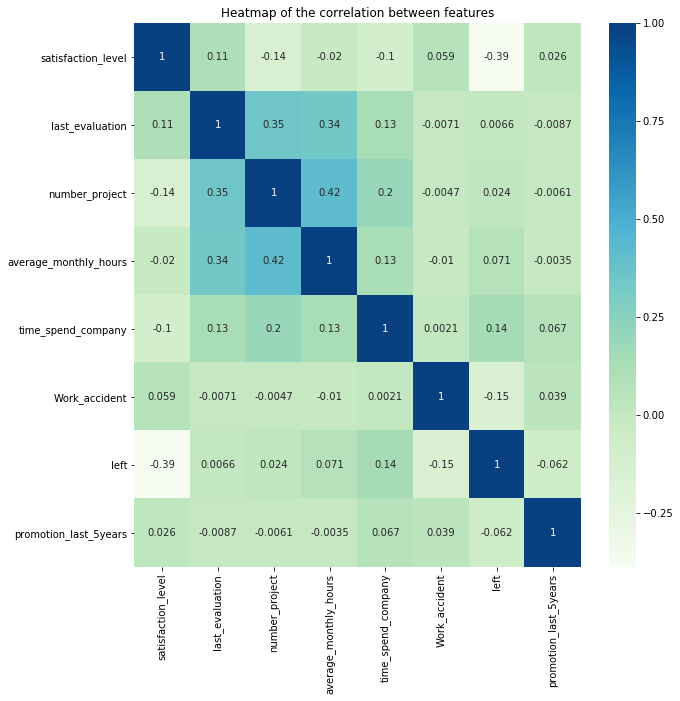

In [124]:
#finding correlation between the features
correlation=data.corr()
fig=plt.figure(figsize=(10,10))
sns.heatmap(correlation,cmap='GnBu',annot=True)
plt.title("Heatmap of the correlation between features")


In [125]:
#Let us focus on the features and their impacts in case of people who left
data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [126]:
data_left=data.loc[data['left']==1]
n_left_records=data_left.shape[0]
print(n_left_records)

3571


In [127]:
data_left.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


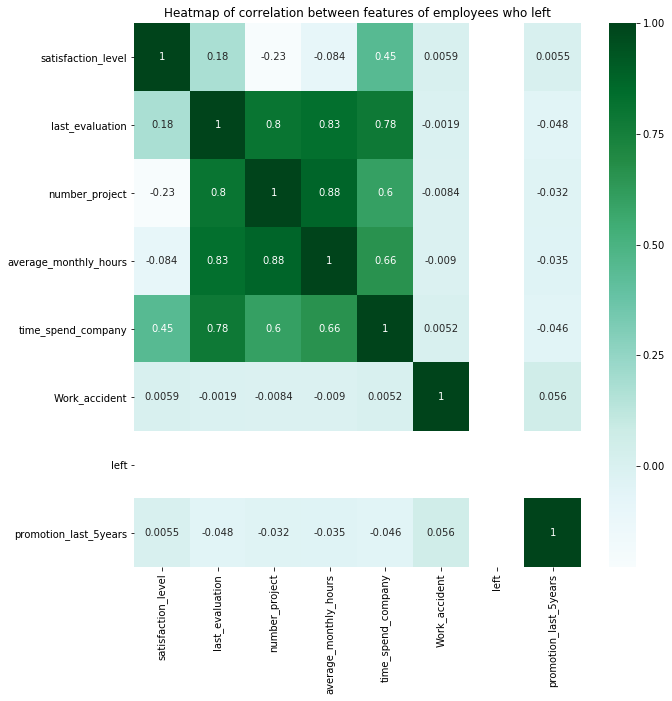

In [128]:
left_corr=data_left.corr()
plt.figure(figsize=(10,10))
sns.heatmap(left_corr,cmap='BuGn',annot=True)
plt.title("Heatmap of correlation between features of employees who left")

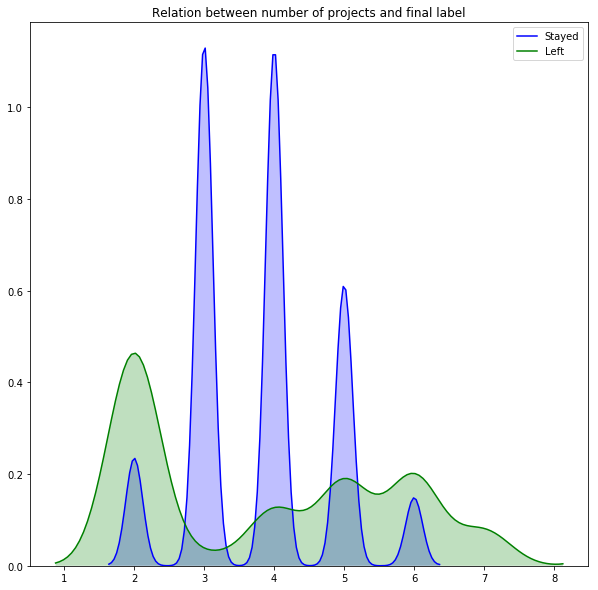

In [129]:
#number of projects, monthly hours, last evaluation seem to have a relationship with satisfaction level
fig=plt.figure(figsize=(10,10))
plot=sns.kdeplot(data.loc[(data['left']==0),'number_project'],color='b',shade=True,label='Stayed')
plot=sns.kdeplot(data.loc[(data['left']==1),'number_project'],color='g',shade=True,label='Left')
plt.title('Relation between number of projects and final label')

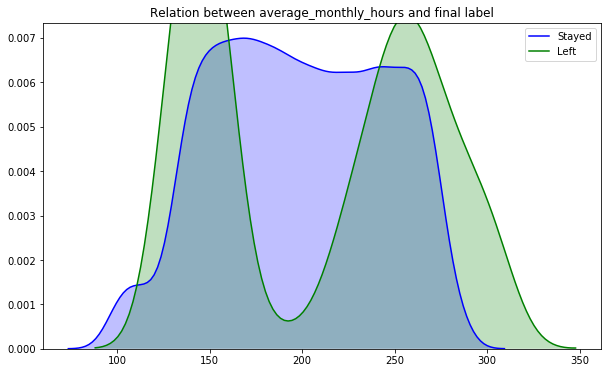

In [130]:
#number of projects, monthly hours, last evaluation seem to have a relationship with satisfaction level
fig=plt.figure(figsize=(10,6))
plot=sns.kdeplot(data.loc[(data['left']==0),'average_monthly_hours'],color='b',shade=True,label='Stayed')
plot=sns.kdeplot(data.loc[(data['left']==1),'average_monthly_hours'],color='g',shade=True,label='Left')
plt.title('Relation between average_monthly_hours and final label')

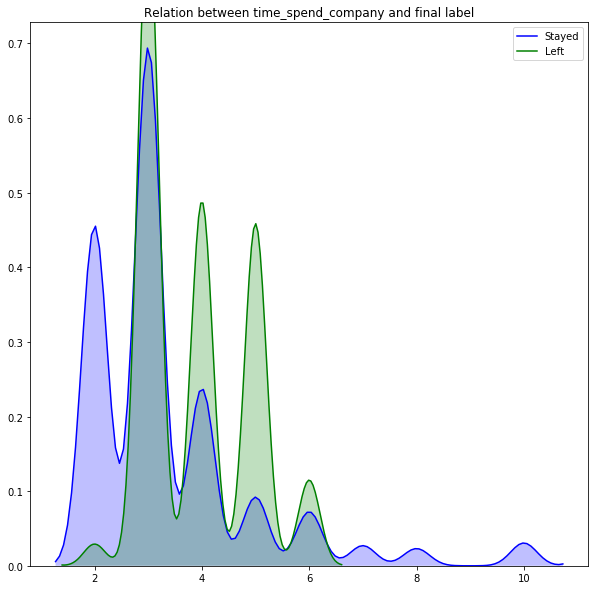

In [131]:
#number of projects, monthly hours, last evaluation seem to have a relationship with satisfaction level
fig=plt.figure(figsize=(10,10))
plot=sns.kdeplot(data.loc[(data['left']==0),'time_spend_company'],color='b',shade=True,label='Stayed')
plot=sns.kdeplot(data.loc[(data['left']==1),'time_spend_company'],color='g',shade=True,label='Left')
plt.title('Relation between time_spend_company and final label')

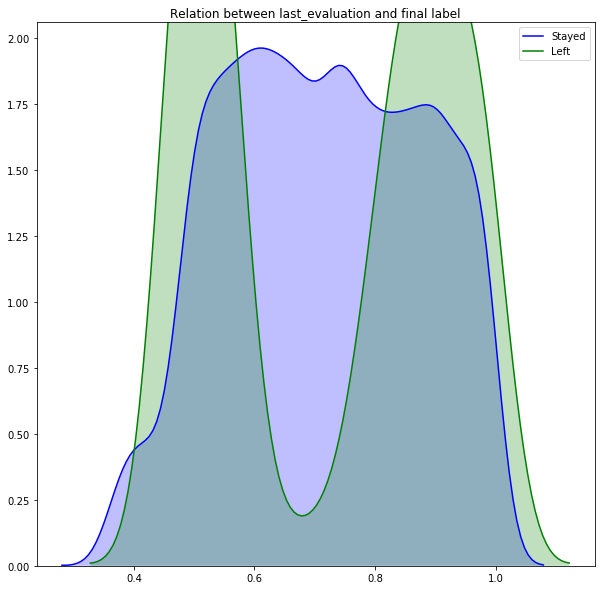

In [132]:
#number of projects, monthly hours, last evaluation seem to have a relationship with satisfaction level
fig=plt.figure(figsize=(10,10))
plot=sns.kdeplot(data.loc[(data['left']==0),'last_evaluation'],color='b',shade=True,label='Stayed')
plot=sns.kdeplot(data.loc[(data['left']==1),'last_evaluation'],color='g',shade=True,label='Left')
plt.title('Relation between last_evaluation and final label')

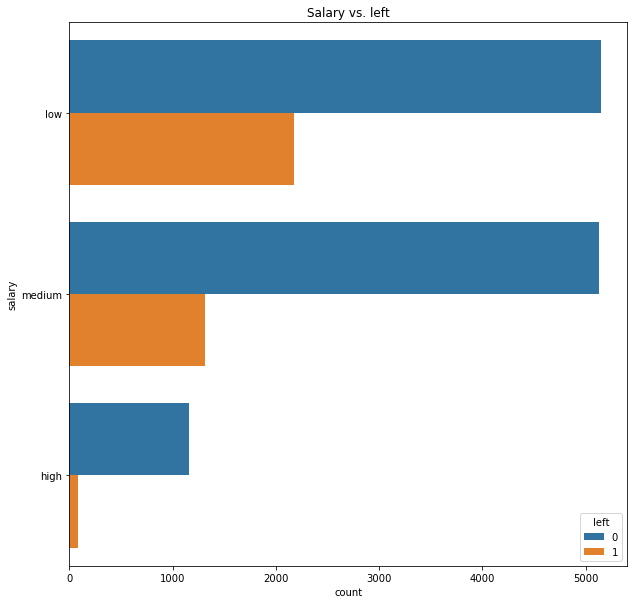

In [133]:

#Salary and Left
fig=plt.figure(figsize=(10,10))
axes[0]=sns.countplot(y='salary',hue='left',data=data)
plt.title("Salary vs. left")


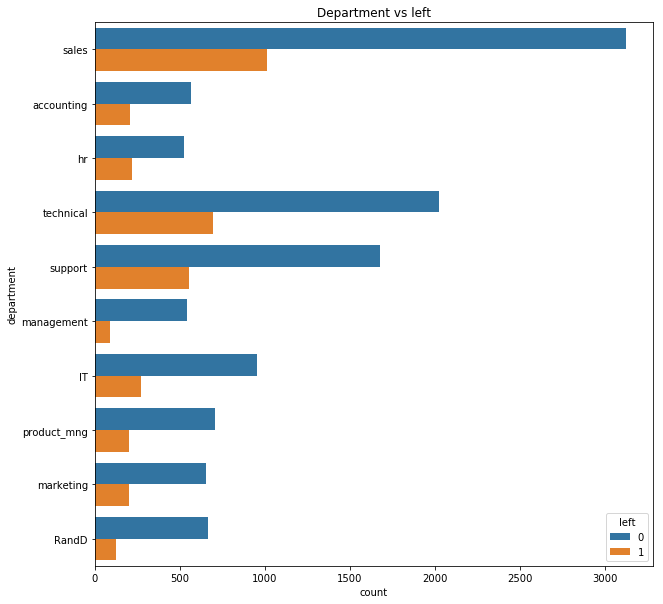

In [134]:
#Department and Left
fig=plt.figure(figsize=(10,10))
axes[1]=sns.countplot(y='department',hue='left',data=data)
plt.title("Department vs left")

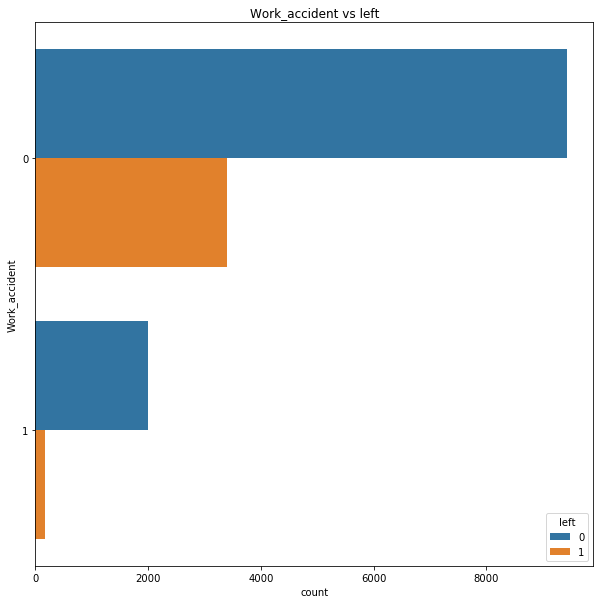

In [135]:
#Department and Left
fig=plt.figure(figsize=(10,10))
axes[1]=sns.countplot(y='Work_accident',hue='left',data=data)
plt.title("Work_accident vs left")

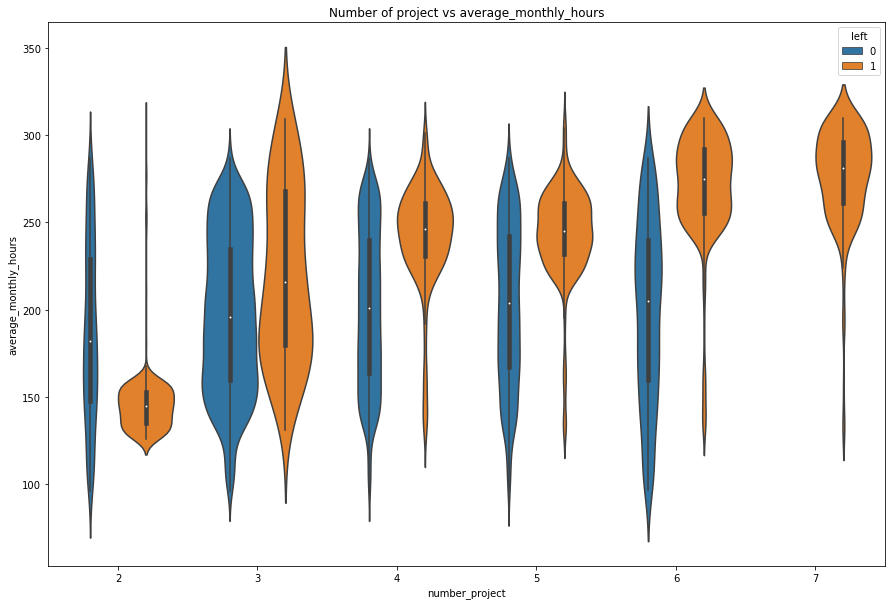

In [136]:
#Relation between satisfaction level and other features
#1- Satisfaction level and number of projects
plt.figure(figsize=(15,10))
sns.violinplot(x='number_project',y='average_monthly_hours',hue='left',data=data)
plt.title("Number of project vs average_monthly_hours")

In [139]:
#removing left from data for the features
features=data.drop(labels=['left'],axis=1)
features.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [140]:
#PCA
from sklearn.decomposition import PCA
pca=PCA().fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')


ValueError: could not convert string to float: 'low'